### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

[Data](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

# 0. 라이브러리, 데이터 준비

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [65]:
df = pd.read_csv('./hotel_bookings.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1. 분석의 목적과 변수 확인

In [66]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### country, agent, company에는 결측치가 많아 고려하지 않겠다. children인 경우 0 값으로 결측치 채움

In [67]:
df['children'] = df['children'].fillna(0)
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [68]:
# 필요없는 & 결측치가 많은 colum 지우기


df = df.drop(['meal', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'agent', 'company', 'customer_type', 'adr', 'reservation_status', 'reservation_status_date'], axis=1)

In [69]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,0,C,C,3,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,0,C,C,4,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,0,A,C,0,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,0,0,A,A,0,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,0,0,A,A,0,0,0,1


### 우리가 사용할 데이터
* hotel : 호텔 종류(Resort Hotel, City Hotel)
* is_canceled : 예약취소여부(1: 취소, 0: 취소하지 않음)
* lead_time : 예약 날짜와 도착 날짜 사이의 일수
* arrival_date_~ : 도착날짜의 년/월/일/주차
* stays_in_weekend_nights : 투숙 또는 예약한 주말 일수
* stays_in_week_nights : 투숙 또는 예약한 평일 일수
* adults : 성인 수
* children : 어린이 수
* babies : 아기 수
* is_repeated_guest : 현재 예약 전 예약 여부
* previous_cancellations : 현재 예약 전에 고객이 취소한 이전 예약 수
* previous_bookings_not_canceled : 현재 예약 전에 고객이 취소하지 않은 이전 예약 수
* reserved_room_type : 예약된 객실 유형의 코드
* assigned_room_type : 예약에 할당된 객실 유형의 코드
* booking_changes : 예약을 변경한 횟수
* days_in_waiting_list : 예약이 고객에게 확인되기 전에 대기 목록에 있었던 일 수
* required_car_parking_spaces : 고객이 필요로 하는 주차 공간 수
* total_of_special_requests : 고객의 특별 요청 수(예: twin bed 또는 high floor)

# 2. 데이터 전체적으로 살펴보기

In [70]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,8.000000,5.000000


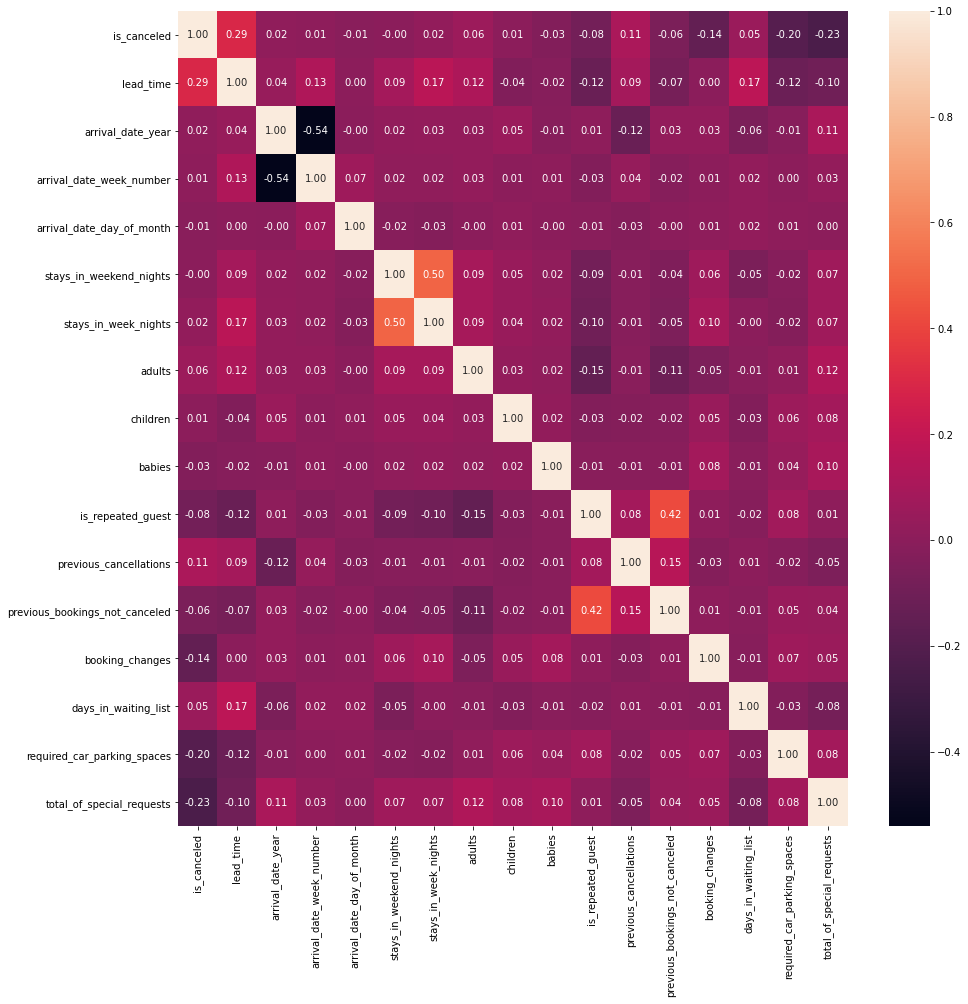

In [71]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f')
plt.show()

### lead_time, is_canceled 사이의 관계가 있을 것 같다.
### previout_cancellations , is_canceled 사이의 관계가 있을 거 같다.
### booking_changes, is_canceled 사이의 관계가 있을 거 같다.

# 3. 데이터 개별속성 파악하기

## 가설 세우기

- 예약 날짜와 도착 날짜가 짧을수록 (= 급하기 예약할 수록) 취소하는 사람들이 많을 것이다.
- 예약을 변경하는 횟수가 적을 수록 취소하는 사람들이 많을 것이다.
- 어느 달에 예약을 취소하는 사람들이 많을까?
- 아이를 많이 데려오면 예약을 취소하는 사람이 많을 것이다.

## I. is_canceled column

In [72]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

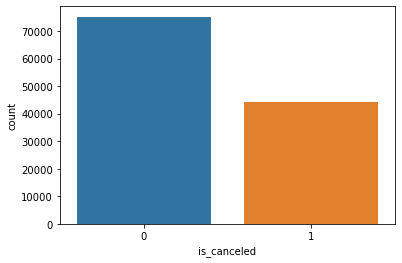

In [73]:
sns.countplot(x='is_canceled', data=df)
plt.show()

### 취소를 안한 사람들이 많긴하다. 
### $ \Rightarrow $ 호텔들이 서비스를 잘하고 있는 듯

# II. lead_time

- 예약 날짜와 도착 날짜가 짧을수록 (= 급하기 예약할 수록) 취소하는 사람들이 많을 것이다.

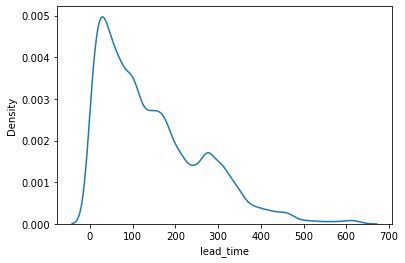

In [102]:
sns.kdeplot(x=df[df['is_canceled'] == 1]['lead_time'])
plt.show()

## lead_time이 작을 수록(= 급하게 예약할수록) 예약을 취소하는 사람들이 많다.

# III. booking_changes

- 예약을 변경하는 횟수가 적을 수록 취소하는 사람들이 많을 것이다.

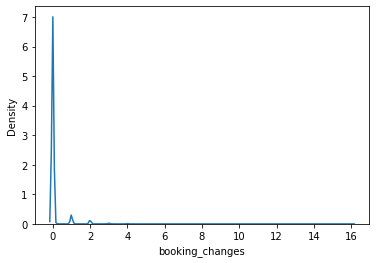

In [104]:
sns.kdeplot(x=df[df['is_canceled'] == 1]['booking_changes'])
plt.show()

## $\Rightarrow$ 예약을 변경하는 횟수가 적을 수록 취소하는 사람들이 많다.
## 예약을 변경할 수록 사람 심리가 미안해져서 그 호텔에 그대로 지낼거 같기 때문에

# IV. arrival_data_month

- 어느 달에 예약을 취소하는 사람들이 많을까?

In [74]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

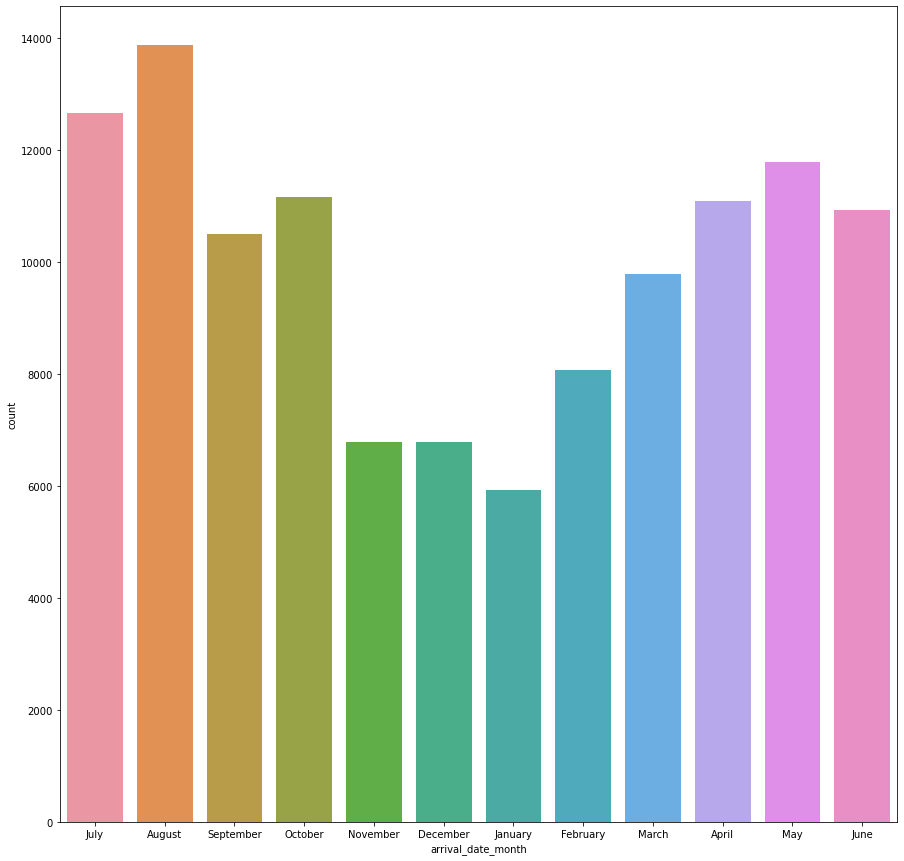

In [75]:
plt.figure(figsize=(15,15))
sns.countplot(x='arrival_date_month', data=df)
plt.show()

### 8월에 가장 많이 예약을 했고, 11월 부터 예약 수가 떨어지더니 1월에 최저를 기록했다. 그리고 2월 부터는 다시 증가하는 막대그래프를 볼 수 있다.

### $\Rightarrow$ 고객 입장 : 11~1월 사이에 호텔 예약을 하는 것이 제일 좋다

In [101]:
df[['is_canceled', 'arrival_date_month']].groupby('arrival_date_month').mean()

,is_canceled
arrival_date_month,
April,0.407972
August,0.377531
December,0.349705
February,0.334160
January,0.304773
July,0.374536
June,0.414572
March,0.321523
May,0.396658


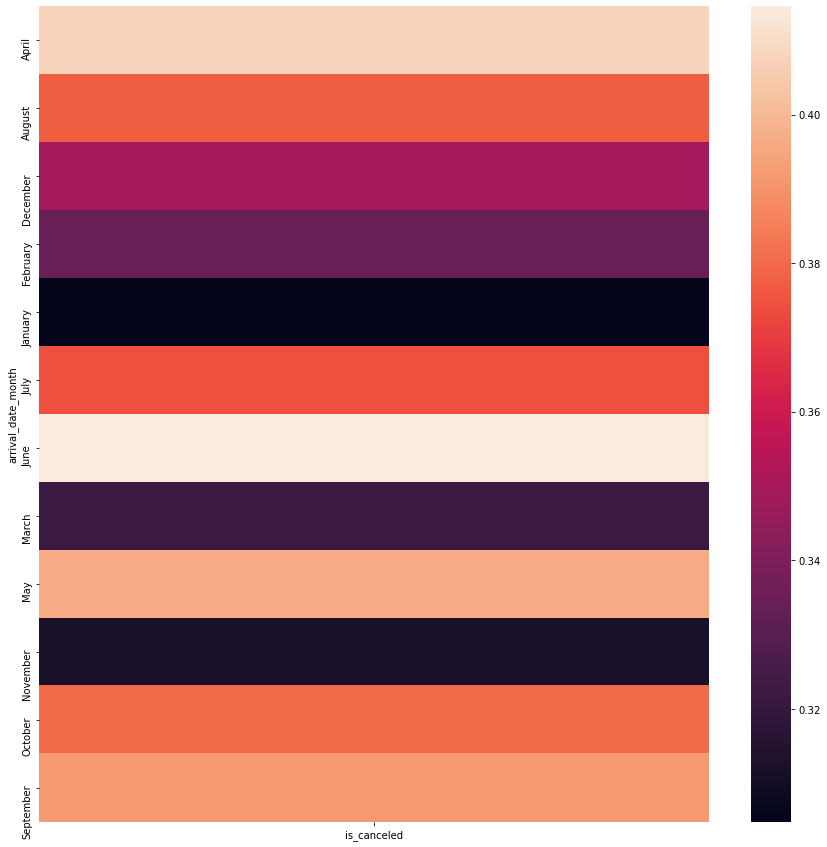

In [99]:
plt.figure(figsize=(15,15))
sns.heatmap(df[['is_canceled', 'arrival_date_month']].groupby('arrival_date_month').mean())
plt.show()

### $\Rightarrow$ 4월과 6월에 취소하는 사람이 제일 많기 때문에 호텔 입장에서는 이 기간에 빡세게 일해야한다. 그리고 1월과 11월에는 예약을 취소하는 사람이 거의 없다

# V. adults, children, babies 

- 아이를 많이 데려오면 예약을 취소하는 사람이 많을 것이다.

In [76]:
df.describe()[['adults', 'children', 'babies']]

,adults,children,babies
count,119390.000000,119390.000000,119390.000000
mean,1.856403,0.103886,0.007949
std,0.579261,0.398555,0.097436
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000
max,55.000000,10.000000,10.000000


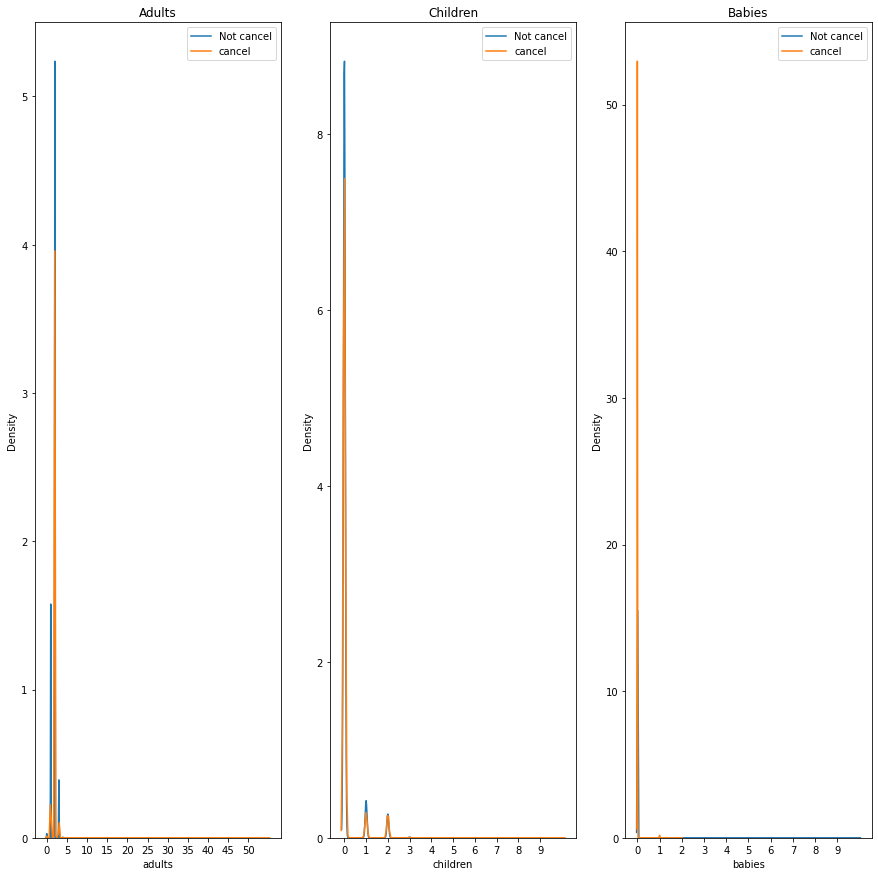

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
sns.kdeplot(x=df[df['is_canceled'] == 0]['adults'], ax=ax[0])
sns.kdeplot(x=df[df['is_canceled'] == 1]['adults'], ax=ax[0])
ax[0].set_title('Adults')
ax[0].set_xticks(np.arange(0, 55, 5))
ax[0].legend(['Not cancel', 'cancel'])

sns.kdeplot(x=df[df['is_canceled'] == 0]['children'], ax=ax[1])
sns.kdeplot(x=df[df['is_canceled'] == 1]['children'], ax=ax[1])
ax[1].set_title('Children')
ax[1].set_xticks(np.arange(0, 10, 1))
ax[1].legend(['Not cancel', 'cancel'])

sns.kdeplot(x=df[df['is_canceled'] == 0]['babies'], ax=ax[2])
sns.kdeplot(x=df[df['is_canceled'] == 1]['babies'], ax=ax[2])
ax[2].set_title('Babies')
ax[2].set_xticks(np.arange(0, 10, 1))
ax[2].legend(['Not cancel', 'cancel'])

plt.show()

## adults, children, babies를 kdeplot으로 시각화 할려고 했는데 제대로 알 수가 없었다. 따라서 catplot으로 다시 시각화 해주었다.

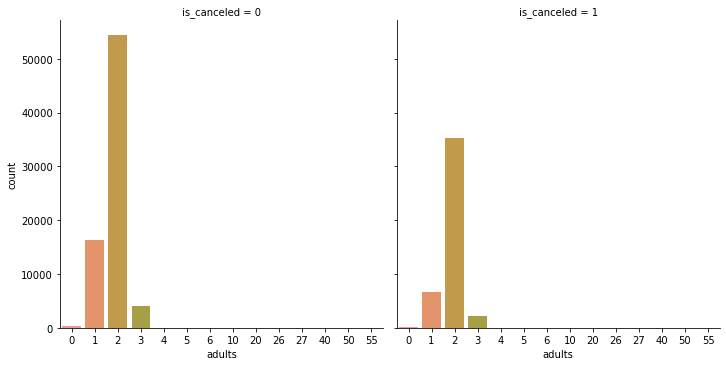

In [78]:
sns.catplot(x='adults', col='is_canceled' ,kind='count' ,data=df)
plt.show()

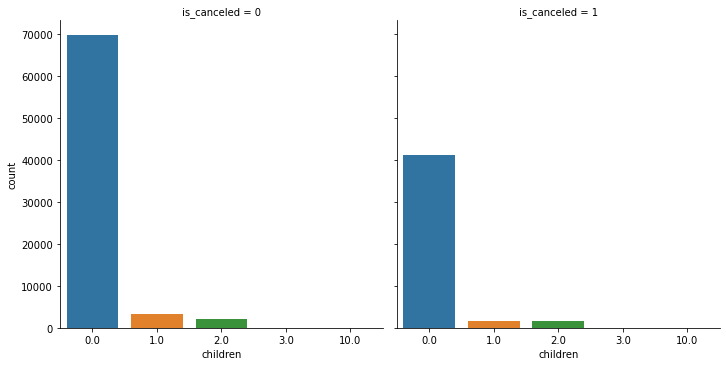

In [82]:
sns.catplot(x='children', col='is_canceled' ,kind='count' ,data=df)
plt.show()

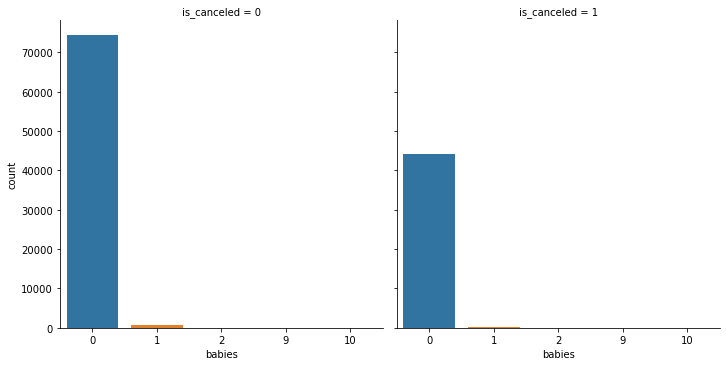

In [81]:
sns.catplot(x='babies', col='is_canceled' ,kind='count' ,data=df)
plt.show()

## children, babies에는 '0'명만 데리고 온 사람들에 대해서 예약을 취소하는 사람들이 있다. 즉, 아이들을 데리고 오면 취소는 거의 안하는 셈
## 하지만 성인들은 2명이 왔을 때 예약 취소를 하는 사람들이 생긴다. (연인 싸움???🤔)